# Programming Assignment - Part 2

Extending DES

## Simulation Study Results


In [1]:
import simstudy2

##### 2.7.1 and 2.7.2: Systems with Different Queue Capacity I 

S =  5
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1313.4923125955215, Variance: 156546.38746347703
Name: Mean queue length, SIM_TIME = 100s, Mean: 1.918457219023174, Variance: 0.37077255929112507
S =  6
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1532.8827283459564, Variance: 294847.15123513347
Name: Mean queue length, SIM_TIME = 100s, Mean: 2.2571290222029967, Variance: 0.6957480334750341
S =  7
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1708.225345694343, Variance: 481740.52919635305
Name: Mean queue length, SIM_TIME = 100s, Mean: 2.529184909897086, Variance: 1.1373259653958434
S =  5
Name: Mean waiting time, SIM_TIME = 1000s, Mean: 1444.7599284536252, Variance: 18198.99630943879
Name: Mean queue length, SIM_TIME = 1000s, Mean: 2.096742851134977, Variance: 0.04392082906834862
S =  6
Name: Mean waiting time, SIM_TIME = 1000s, Mean: 1755.9115341396905, Variance: 36967.90975122871
Name: Mean queue length, SIM_TIME = 1000s, Mean: 2.562213089500763, Variance: 0.0881763913291

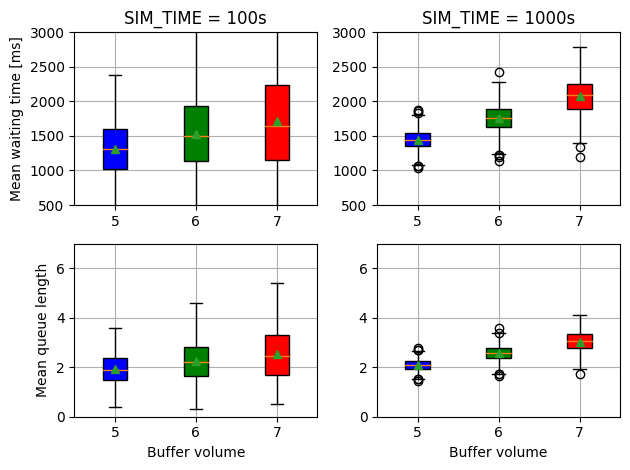

In [2]:
simstudy2.task_2_7_1_2()

S =  5
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1238.0222756796989, Variance: 166306.60074416953
Name: Mean queue length, SIM_TIME = 100s, Mean: 1.8141976553254653, Variance: 0.38904469855842466
S =  6
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1452.5438956492176, Variance: 304337.8435868124
Name: Mean queue length, SIM_TIME = 100s, Mean: 2.145422483954394, Variance: 0.7113178761291309
S =  7
Name: Mean waiting time, SIM_TIME = 100s, Mean: 1623.2702594446907, Variance: 494070.945383659
Name: Mean queue length, SIM_TIME = 100s, Mean: 2.412204468574415, Variance: 1.1591859405580118
S =  5
Name: Mean waiting time, SIM_TIME = 1000s, Mean: 1381.2534192789733, Variance: 19351.031948312633
Name: Mean queue length, SIM_TIME = 1000s, Mean: 2.0060448471817067, Variance: 0.04625590104706021
S =  6
Name: Mean waiting time, SIM_TIME = 1000s, Mean: 1691.0321670358926, Variance: 38854.315606131495
Name: Mean queue length, SIM_TIME = 1000s, Mean: 2.4690307938899934, Variance: 0.09209259135

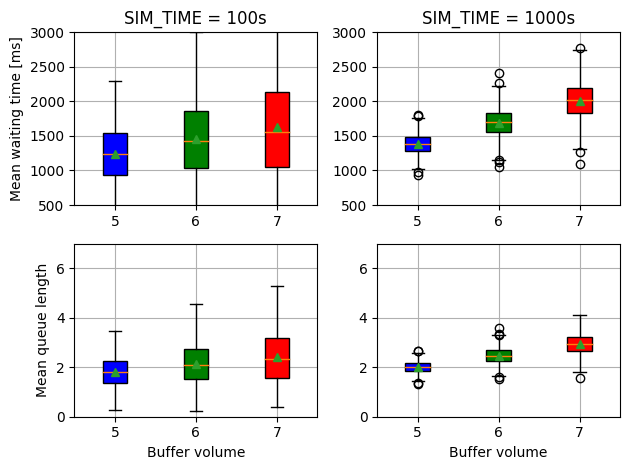

In [3]:
simstudy2.task_2_7_3()

## Answers to "Analysis and General Questions"

####  2.8.1: Systems with Different Queue Capacity

We can make the following observations:

1. When running a longer simulation, the overall variance decreases significantly and the mean increases

The variance decrease can be explained by the large numbers law, as longer simulation means more samples are collected for the variance calculation. Why does the mean increase, as the simulation time gets longer? To answer this question, we can check the following two plots (below). We run the simulation with 100s and 1000s, each for 100 times, and take the average of the waiting time of the first 120 and 1200 packets. By having average, we eliminate the effect of randomness. On average, the first 40 packets have smaller waiting time, while the remaining packets have a fixed waiting time (in this case around 1500ms). In the simulator, we take the average of waiting times from all packets in a run. Therefore, the first 40 small values will have a greater effect for 100 seconds simulation, making the "average waiting time" smaller.

2. The mean waiting time and the mean queue length increase with an increased buffer size

The insrease of the mean waiting time and queue length with the increase in the buffer size can be explained by the fact that there are more spaces in queue. Indeed, instead of being dropped as in case of a smaller buffer, packets are inserted to a longer queue and have to wait longer.

3. The variance increases with increased buffer size

The variances of the waiting time and queue length get greater with the queue capacity, since there is a wider range of values the corresponding values can get in case queue becomes bigger.

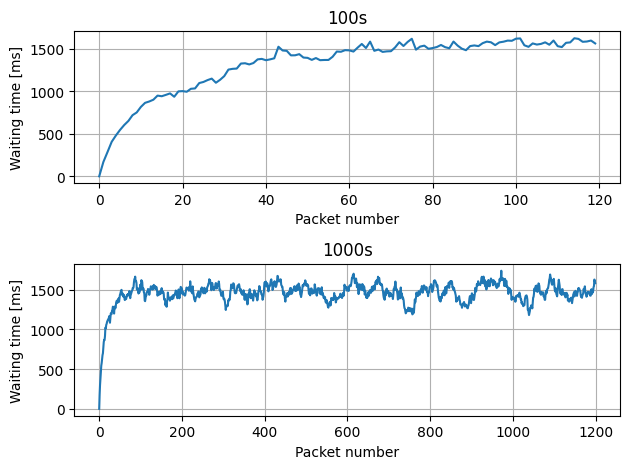

In [4]:
simstudy2.study_waiting_time()

####  2.8.2: Systems with Different Number of Servers

We can see that the waiting time and queue length are always slightly smaller when we consider a system with two servers. The difference descreases for a longer simulation and for a larger buffer size. 

Note than when there are already some packets waiting in the buffer, the system with one server behaves similarly to the system with two servers, as packets depart from the queue with the same rate $\mu$. However, if there is already one packet in the system being served, in the one-server scenario, the new packet has to wait for the server to become free, whereas if there are two servers and the secons one is available, the packet can be served directly without waiting. Thus, when the buffer is empty (e.g., in the transient phase), the packets are served faster and queue is filled slower for the two-severs system.

When the simulation time gets longer, the effect of the transinet phase when the queue is not filled has less effect. Thus, the difference between one-server and two-servers system gets less with simulation time. If the buffer size increases, there is a smaller probability that it gets empty. Thus, the difference between one-server and two-servers system gets less with buffer length.

####  2.8.2: One or Two Servers?

Even though the average waiting time of the packet gets slightly less with two servers, the serving time is doubled. Thus, from the user side, it is more beneficial to be served by a single server.


####  2.8.2: Data Handling for Time-Dependent Counter

From the lecture, the formulas for mean and variance for TDC are the following:
$$\bar{X} = \frac{\sum_{i=0}^{n-1} X(t_{i-1}) (t_i - t_{i-1})}{t_n - t_0}$$,

$$\bar{S^2} = \frac{n}{n-1} (\bar{X^2} - \bar{X}^2),$$ where 

$$\bar{X^2} = \frac{\sum_{i=0}^{n-1} X^2(t_{i-1}) (t_i - t_{i-1})}{t_n - t_0}$$.



For the TDC, currently we store the list of values $X(t_{i-1})$, as well as the list of durations $t_i - t_{i-1}$. The more efficient way would be to store two sums: $\sum_{i=0}^{c-1} X(t_{c-1}) (t_c - t_{c-1})$ and $\sum_{i=0}^{c-1} X^2(t_{c-1}) (t_i - t_{c-1})$, where $c$ is the current sample number. The sums are updates with every new sampled by adding corresponding terms $X(t_{c}) (t_{c+1} - t_{c})$ and $X^2(t_{c}) (t_{c+1} - t_{c})$